# Analyse of amip-future4K PPE

We want to study the impact of parameter values on the crash/success of the simulations. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Read the .csv file 
PPE_future4K = pd.read_csv('./crash_amip-future4K.csv', sep=';').drop(['t_IDs'],axis=1)
PPE_future4K

,Y,AKN,ALPHAT,ALD,ALMAVE,AGREF,AGRE1,AGRE2,RAUTEFR,RQLCR,...,VVN,VVX,ALFX,REFLCAPE,FNEBC,GCVTURB,RLWINHF_ICE,RLWINHF_LIQ,RSWINHF_ICE,RSWINHF_LIQ
0,1,0.175049,1.488544,1.449805,15.532379,-0.238847,2.270914,5.235486,0.006996,0.000441,...,-3.147981,-38.083048,0.071004,6.731691,14.254849,0.000063,0.864952,0.677901,0.768799,0.744990
1,1,0.167680,1.880158,1.973222,14.357632,-0.250957,4.865664,7.353332,0.006406,0.000642,...,-4.301296,-32.742882,0.056741,4.810351,12.882991,0.000074,0.802851,0.616178,0.800514,0.733552
2,0,0.173487,2.086636,2.070605,21.338777,-0.278889,2.642393,4.222709,0.008153,0.000210,...,-3.440333,-33.880859,0.074964,6.226616,3.646718,0.000077,0.779812,0.660804,0.648204,0.738744
3,0,0.160021,2.370838,1.835850,15.060141,-0.301109,5.391311,3.782260,0.003023,0.000394,...,-4.611250,-35.147508,0.088527,5.486981,8.104176,0.000077,0.906631,0.754324,0.828823,0.746475
4,1,0.134186,1.724029,1.558606,8.468488,-0.134411,3.785087,4.299384,0.006238,0.000546,...,-2.639630,-38.810282,0.042651,7.476803,11.590295,0.000063,0.831459,0.778510,0.715348,0.721524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,0.235124,0.639449,0.514899,18.343039,-0.027631,7.896837,0.542174,0.009771,0.000783,...,-4.316454,-44.547412,0.075767,3.471398,1.944605,0.000033,0.720930,0.578998,0.719267,0.899751
85,0,0.237933,2.198835,1.553236,11.543602,-0.466607,0.817216,8.409499,0.008878,0.000176,...,-4.625903,-42.573442,0.058992,6.394914,8.983192,0.000046,0.614161,0.925921,0.853630,0.970759
86,0,0.207061,2.870572,1.206132,8.261892,-0.438419,9.252452,1.786200,0.009309,0.000332,...,-1.079484,-37.453183,0.046258,1.454460,9.754811,0.000092,0.557920,0.637687,0.612954,0.651729
87,0,0.079234,1.492738,2.281680,27.434099,-0.117036,9.167005,5.118281,0.008366,0.000186,...,-2.474754,-48.694364,0.122984,4.649883,10.151128,0.000030,0.875254,0.758121,0.500724,0.772966


In [2]:
# Save the parameters names in a list 
param_names=list(PPE_future4K.columns.values)
param_names

['Y',
 'AKN',
 'ALPHAT',
 'ALD',
 'ALMAVE',
 'AGREF',
 'AGRE1',
 'AGRE2',
 'RAUTEFR',
 'RQLCR',
 'RAUTEFS',
 'RQICRMIN',
 'RQICRMAX',
 'TFVL',
 'TFVI',
 'TFVR',
 'TFVS',
 'RKDN',
 'RKDX',
 'TENTR',
 'TENTRX',
 'VVN',
 'VVX',
 'ALFX',
 'REFLCAPE',
 'FNEBC',
 'GCVTURB',
 'RLWINHF_ICE',
 'RLWINHF_LIQ',
 'RSWINHF_ICE',
 'RSWINHF_LIQ']

In [3]:
# Definition d'une fonction pour un meilleur scattering (problème d'échelle sur l'axe y dans sns.pairplot)
def better_scatter(x, y, **kwargs):
    sns.scatterplot(x, y, **kwargs, alpha=alpha)
    margin = (max(y) - min(y)) * 0.1
    plt.ylim(min(y) - margin, max(y) + margin)

In [4]:
# Definition fonction Pair plot :
import seaborn as sns
import matplotlib.pyplot as plt

def pairplot(df, list_param, hue, markers, list_colors, list_vars, alpha, labels, title):

    g = sns.pairplot(df[list_param], hue=hue,markers=markers,
            palette=list_colors,vars=list_vars, diag_kind='hist', diag_kws = {'alpha': alpha}, 
                    plot_kws = {'alpha': alpha})

    g = g.map_offdiag(better_scatter)

    handles = g._legend_data.values()
    #labels = g._legend_data.keys()
    g._legend.remove()
    g.fig.legend(handles=handles, 
             labels=labels,
             loc='lower left', ncol=5, fontsize=15, markerscale=2)
    g.fig.subplots_adjust(top=0.92, bottom=0.08)

    # Title 
    plt.suptitle(title, size = 28)
    #plt.legend(labels)
    
    plt.show()

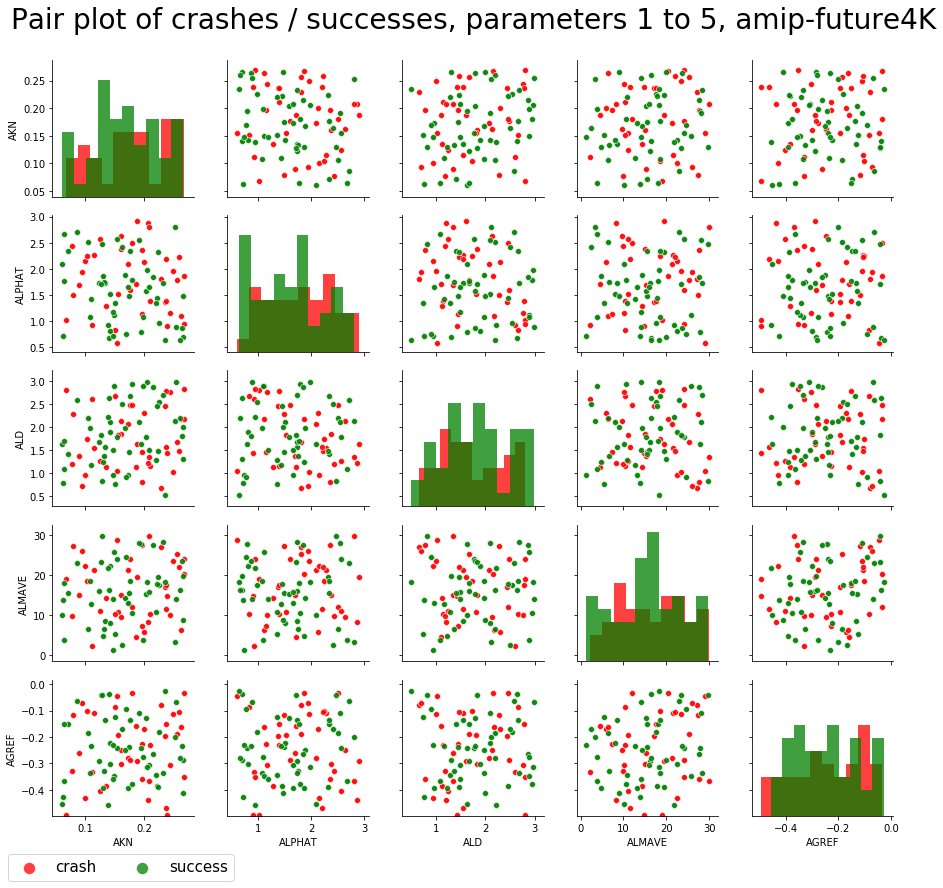

In [5]:
df=PPE_future4K
list_param=param_names[0:6]
hue=param_names[0]
markers=["o","o"]
list_colors=["red","green"]
list_vars=param_names[1:6]
alpha=0.75
labels=["crash","success"]
title='Pair plot of crashes / successes, parameters 1 to 5, amip-future4K'
pairplot(df, list_param, hue, markers, list_colors, list_vars, alpha, labels, title)

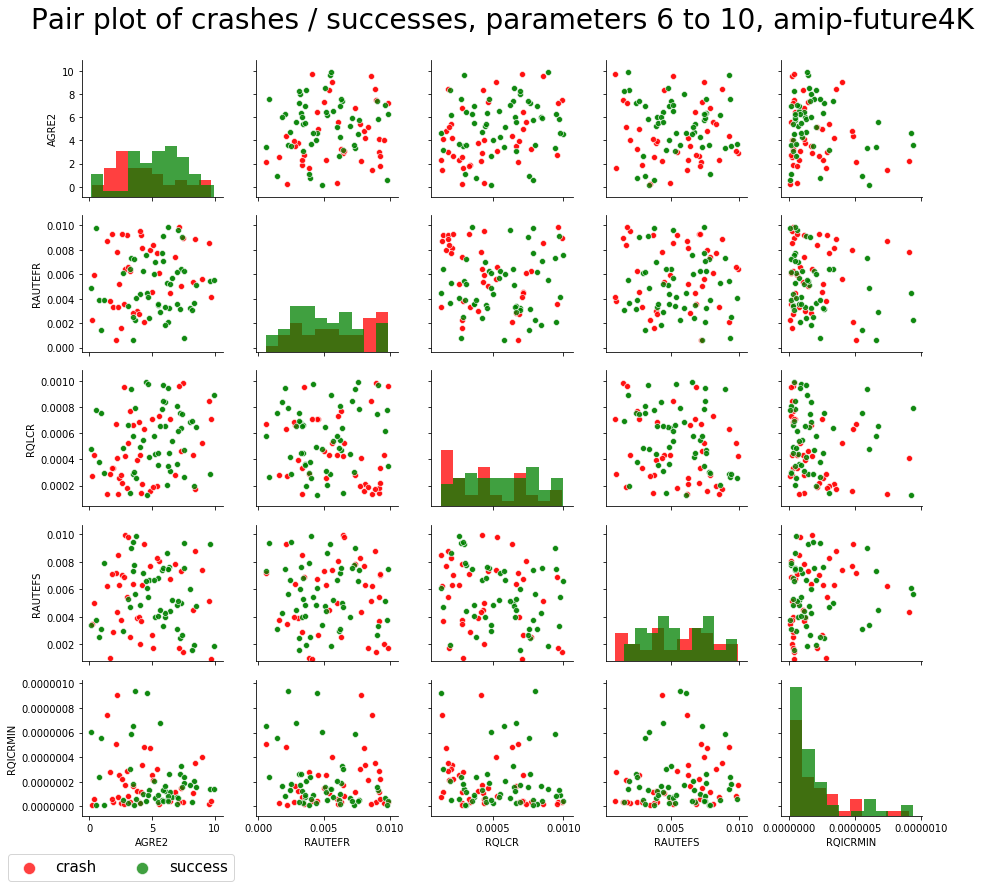

In [6]:
df=PPE_future4K
list_param=param_names[7:12]
list_param.append(param_names[0])
hue=param_names[0]
markers=["o","o"]
list_colors=["red","green"]
list_vars=param_names[7:12]
alpha=0.75
labels=["crash","success"]
title='Pair plot of crashes / successes, parameters 6 to 10, amip-future4K'
pairplot(df, list_param, hue, markers, list_colors, list_vars, alpha, labels, title)

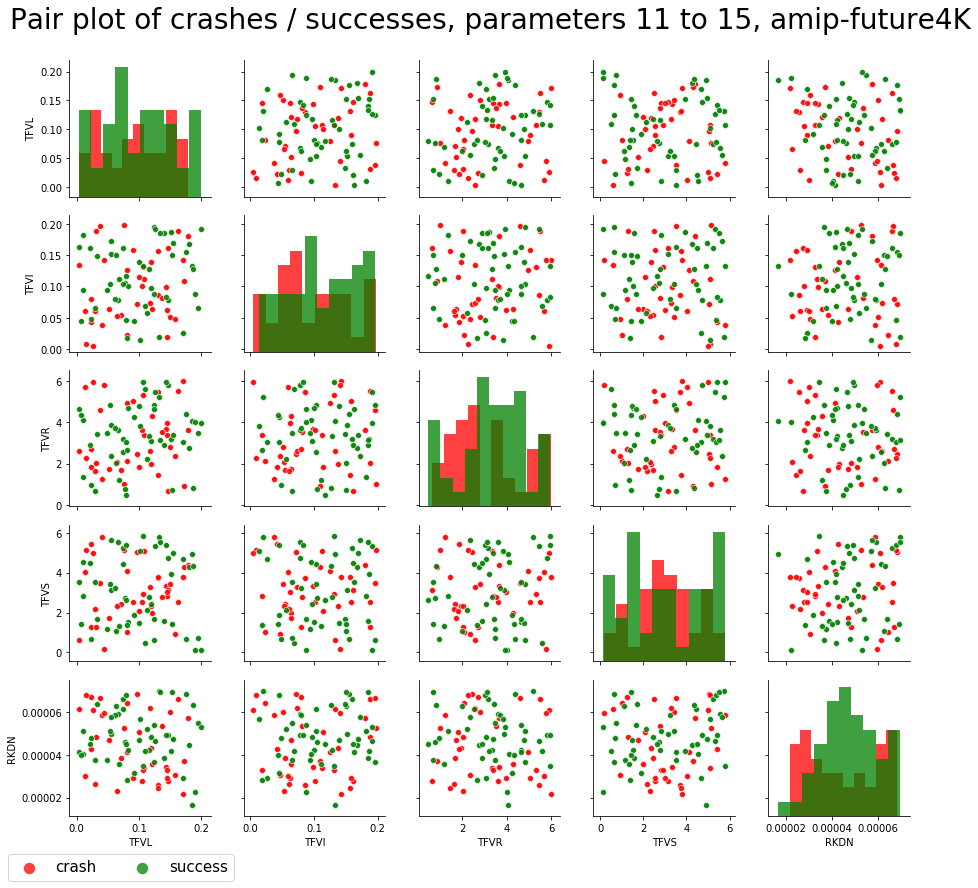

In [7]:
df=PPE_future4K
list_param=param_names[13:18]
list_param.append(param_names[0])
hue=param_names[0]
markers=["o","o"]
list_colors=["red","green"]
list_vars=param_names[13:18]
alpha=0.75
labels=["crash","success"]
title='Pair plot of crashes / successes, parameters 11 to 15, amip-future4K'
pairplot(df, list_param, hue, markers, list_colors, list_vars, alpha, labels, title)

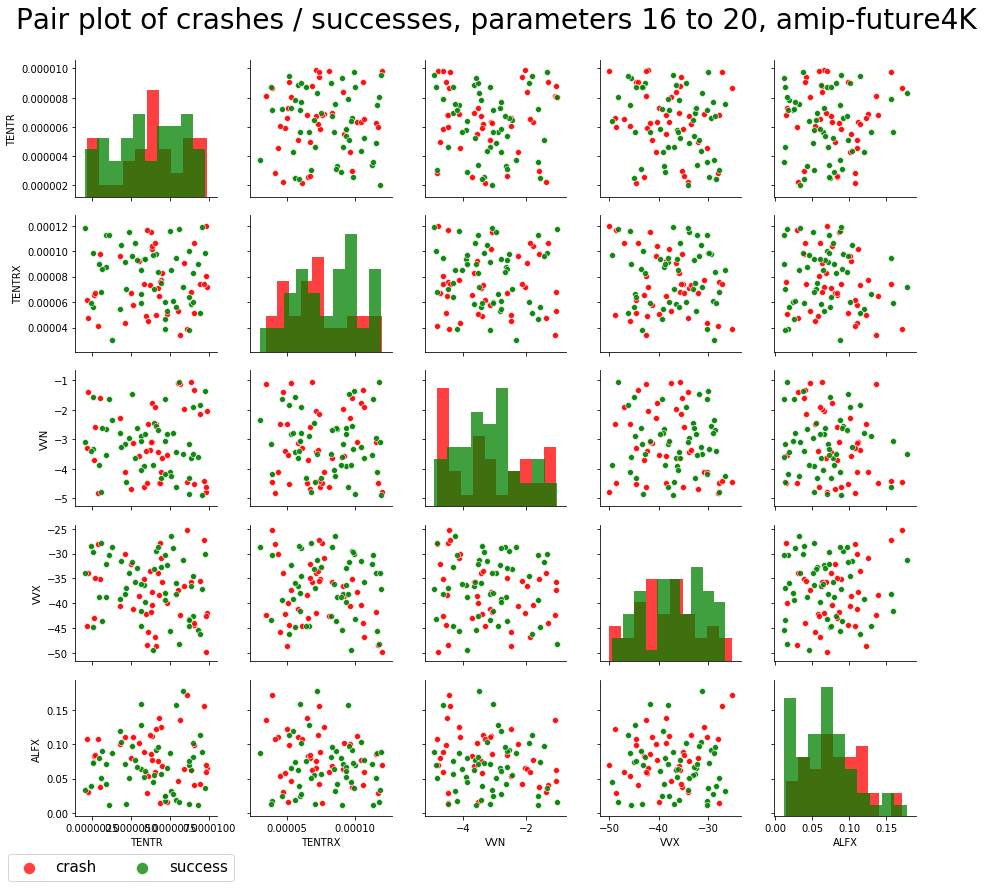

In [8]:
df=PPE_future4K
list_param=param_names[19:24]
list_param.append(param_names[0])
hue=param_names[0]
markers=["o","o"]
list_colors=["red","green"]
list_vars=param_names[19:24]
alpha=0.75
labels=["crash","success"]
title='Pair plot of crashes / successes, parameters 16 to 20, amip-future4K'
pairplot(df, list_param, hue, markers, list_colors, list_vars, alpha, labels, title)

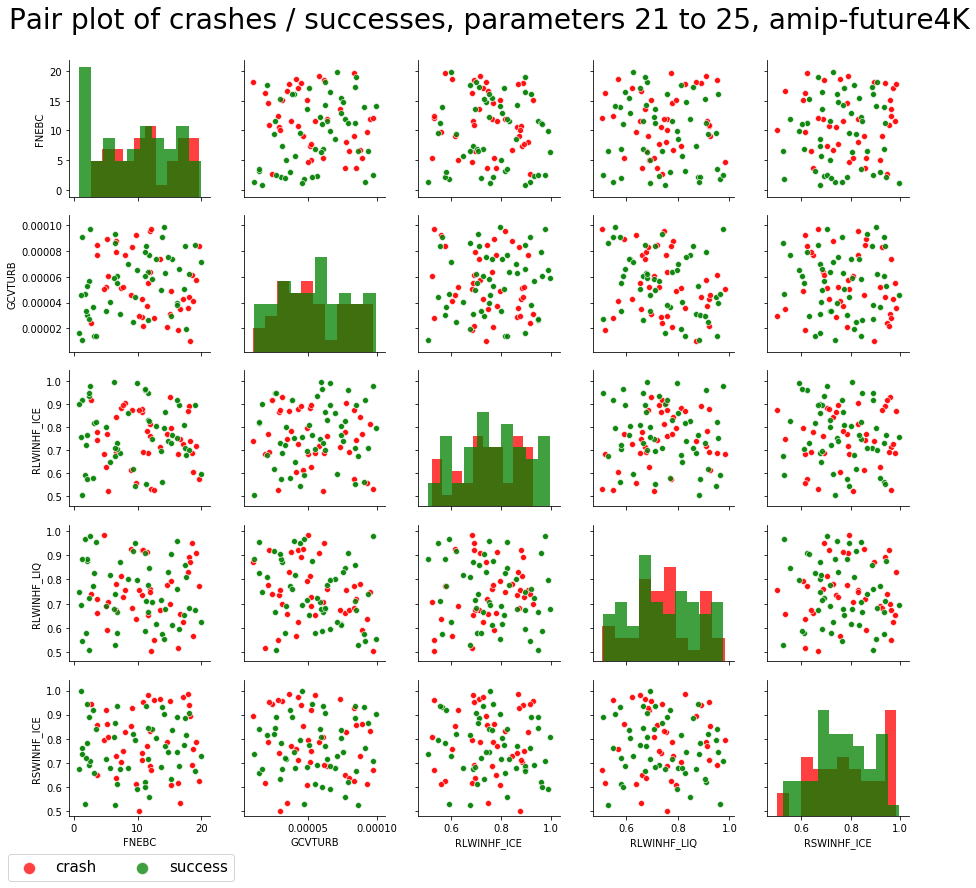

In [9]:
df=PPE_future4K
list_param=param_names[25:30]
list_param.append(param_names[0])
hue=param_names[0]
markers=["o","o"]
list_colors=["red","green"]
list_vars=param_names[25:30]
alpha=0.75
labels=["crash","success"]
title='Pair plot of crashes / successes, parameters 21 to 25, amip-future4K'
pairplot(df, list_param, hue, markers, list_colors, list_vars, alpha, labels, title)

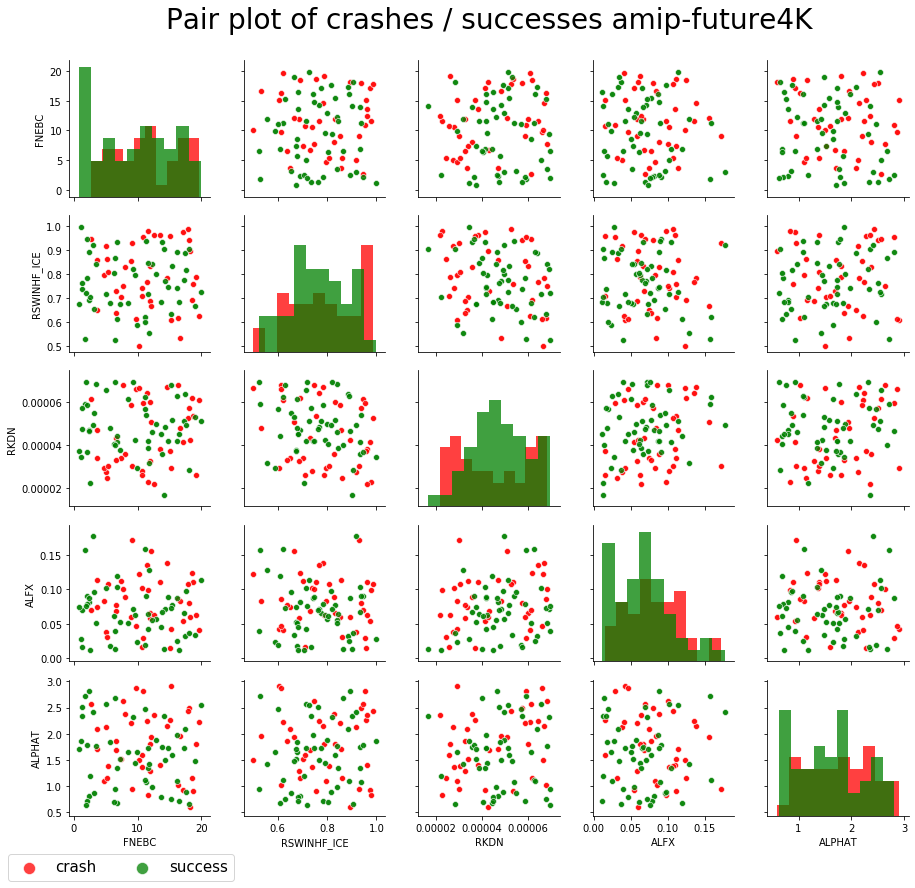

In [14]:
df=PPE_future4K
list_param=['FNEBC','RSWINHF_ICE','RKDN','ALFX','ALPHAT']
list_param.append(param_names[0])
hue=param_names[0]
markers=["o","o"]
list_colors=["red","green"]
list_vars=['FNEBC','RSWINHF_ICE','RKDN','ALFX','ALPHAT']
alpha=0.75
labels=["crash","success"]
title='Pair plot of crashes / successes amip-future4K'
pairplot(df, list_param, hue, markers, list_colors, list_vars, alpha, labels, title)